In [109]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
leakage_dataset_train_100 = pd.read_csv(r"Leakage Detection\leakage_dataset_train_100.csv")
#leakage_dataset_train_1000 = pd.read_csv(r"Leakage Detection\leakage_dataset_train_1000.csv")
leakage_dataset_validation_1000 = pd.read_csv(r"Leakage Detection\leakage_dataset_validation_1000.csv")

In [111]:
X_train = leakage_dataset_train_100[['mfc1', 'mfc2', 'mfc3', 'mfc4']].to_numpy()
Y_train = leakage_dataset_train_100[['y1', 'y2']].to_numpy()

In [112]:
X_validation = leakage_dataset_validation_1000[['mfc1', 'mfc2', 'mfc3', 'mfc4']].to_numpy()
Y_validation = leakage_dataset_validation_1000[['y1', 'y2']].to_numpy()

In [113]:
leakage_dataset_train_100.isnull().sum()

y1      0
y2      0
mfc1    0
mfc2    0
mfc3    0
mfc4    0
dtype: int64

Text(0.5, 0, 'Data')

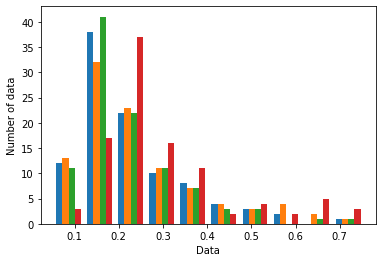

In [114]:
plt.hist(X_train)
plt.ylabel('Number of data')
plt.xlabel('Data')

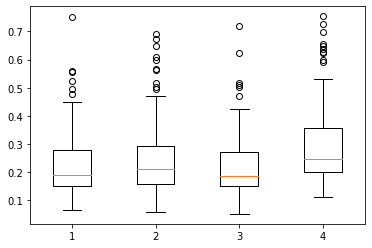

In [115]:
%matplotlib inline
B = plt.boxplot(X_train)
plt.show()

In [116]:
list_whisker = [item.get_ydata() for item in B['whiskers']]
list_whisker

[array([0.15104118, 0.06433784]),
 array([0.27953555, 0.4504011 ]),
 array([0.15927049, 0.0595173 ]),
 array([0.2926093 , 0.46881146]),
 array([0.15077288, 0.05122426]),
 array([0.27253617, 0.42546578]),
 array([0.20039553, 0.11240221]),
 array([0.35654869, 0.53036271])]

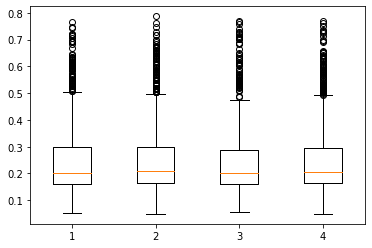

In [117]:
%matplotlib inline
B1 = plt.boxplot(X_validation)
plt.show()

In [118]:
list_whisker_val = [item.get_ydata() for item in B1['whiskers']]
list_whisker_val

[array([0.16234618, 0.05349716]),
 array([0.2993559 , 0.50403049]),
 array([0.16344416, 0.04891348]),
 array([0.29840857, 0.49760057]),
 array([0.16077478, 0.05659426]),
 array([0.28779415, 0.47630593]),
 array([0.16270096, 0.04941728]),
 array([0.29547214, 0.49441948])]

In [119]:
diff1 = list_whisker[-2][1] - list_whisker_val[-2][1]
diff2 = list_whisker[-1][1] - list_whisker_val[-1][1]
diff = (diff1+diff2)/2
diff

0.049464080536921334

In [120]:
X_train[:,-1] = X_train[:,-1] - diff
X_train[:,:-1] = X_train[:,:-1] + diff/3

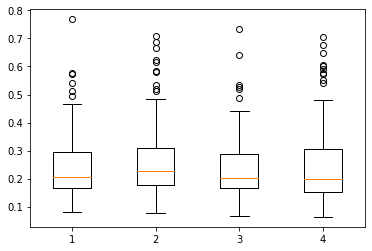

[array([0.16752921, 0.08082586]),
 array([0.29602357, 0.46688912]),
 array([0.17575852, 0.07600533]),
 array([0.30909733, 0.48529949]),
 array([0.16726091, 0.06771229]),
 array([0.28902419, 0.44195381]),
 array([0.15093145, 0.06293813]),
 array([0.30708461, 0.48089863])]

In [121]:
%matplotlib inline
B2 = plt.boxplot(X_train)
plt.show()
list_whisker_new = [item.get_ydata() for item in B2['whiskers']]
list_whisker_new

In [122]:
# count = 0
# lower_whisker = 0
# upper_whisker = 0
# for i in list_whisker[:-2]:
#     if count%2 == 0:
#         lower_whisker = lower_whisker + i[1]
#     if count%2 != 0:
#         upper_whisker += i[1]
#     count += 1
    
# lower_whisker = lower_whisker/3
# upper_whisker = upper_whisker/3

# print(lower_whisker)
# print(upper_whisker)

In [123]:
# diff_lower_whisker = list_whisker[-2][1] - lower_whisker
# diff_lower_whisker = float("{:10.9f}".format(diff_lower_whisker))
# diff_upper_whisker = list_whisker[-1][1] - upper_whisker
# diff_upper_whisker = float("{:10.9f}".format(diff_upper_whisker))
# print(diff_lower_whisker)
# print(diff_upper_whisker)

In [124]:
# X_train[:,-1] = X_train[:,-1] - diff_lower_whisker
# X_train

In [125]:
# lst = []
# for i in X_train:
#     sum = 0
#     for j in i:
#         sum += j
#     lst.append(sum)
# lst

In [126]:
# %matplotlib inline
# B = plt.boxplot(X_train)
# plt.show()

Text(0.5, 0, 'Data')

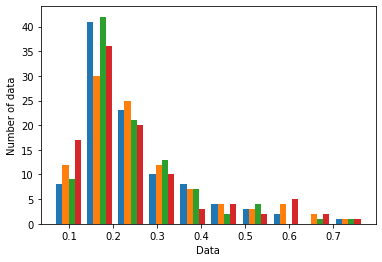

In [127]:
plt.hist(X_train)
plt.ylabel('Number of data')
plt.xlabel('Data')

In [128]:
# lst = []
# for i in X_train[:,:-1]:
#     sum = 0
#     for j in i:
#         sum += j
#     lst.append(sum)
# X_train[:,-1] = np.ones(100) - lst

In [129]:
l0 = tf.keras.layers.Dense(units = 4, input_shape = [4])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 128)
l3 = tf.keras.layers.Dense(units = 2)
model = tf.keras.Sequential([l0,l1,l2,l3])

In [130]:
X_train.shape

(100, 4)

In [131]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 64)                320       
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 8,918
Trainable params: 8,918
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [133]:
history = model.fit(X_train, Y_train, epochs=500, verbose=False, validation_data=(X_validation, Y_validation))

In [134]:
print(history.history['accuracy'][-1])

0.9200000166893005


In [135]:
print(model.predict(np.array([0.168776848,0.13959502,0.161950127,0.529678005]).reshape(1,4)))

1/1 [==============================] - 0s 79ms/step
[[-0.7170823 -0.6261459]]


In [136]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            # Define the hyperparameter.
            units=hp.Int("units", min_value=8, max_value=256, step=16),
            activation="relu",
        )
    )
    model.add(layers.Dense(2, activation="softmax"))
    model.compile(
        optimizer="adam", loss=tf.keras.losses.MeanSquaredError(), metrics=["accuracy"],
    )
    return model

In [137]:
build_model(keras_tuner.HyperParameters())

In [138]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
)

In [139]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 256, 'step': 16, 'sampling': None}


In [140]:
tuner.search(X_train, Y_train, epochs=100, validation_data=(X_validation, Y_validation))

Trial 3 Complete [00h 00m 21s]
val_accuracy: 0.9385000169277191

Best val_accuracy So Far: 0.9504999816417694
Total elapsed time: 00h 01m 03s
INFO:tensorflow:Oracle triggered exit


In [141]:
# best_model = tuner.get_best_models(num_models=1)[0]
# best_model.build(input_shape=[4])
# best_model.summary()

In [142]:
#best_model.build(input_shape=[])
tuner.results_summary()

Results summary
Results in my_dir\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 248
Score: 0.9504999816417694
Trial summary
Hyperparameters:
units: 184
Score: 0.9500000178813934
Trial summary
Hyperparameters:
units: 88
Score: 0.9385000169277191


In [143]:
best_hps = tuner.get_best_hyperparameters(5)
best_model = build_model(best_hps[0])
x_all = np.concatenate((X_train, X_validation))
y_all = np.concatenate((Y_train, Y_validation))
best_model.fit(x=x_all, y=y_all, epochs=1)

35/35 [==============================] - 1s 1ms/step - loss: 0.5458 - accuracy: 0.7564


In [144]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 248)               1240      
                                                                 
 dense_3 (Dense)             (None, 2)                 498       
                                                                 
Total params: 1,738
Trainable params: 1,738
Non-trainable params: 0
_________________________________________________________________


In [145]:
print(best_model.predict(np.array([0.232169757,0.182380097,0.209651618,0.375798528]).reshape(1,4)))

1/1 [==============================] - 0s 63ms/step
[[0.49365035 0.5063497 ]]
